# SVM

-   SVM is a supervised learning algorithm that aims to find an optimal hyperplane that separates different classes in the feature space.
-   It is based on the concept of support vectors, which are the data points closest to the decision boundary.
-   SVM can handle both linearly separable and non-linearly separable data by using different kernel functions.

# Formula


1. Decision Function:

The decision function in SVM is used to classify new data points:

$$f(x) = sign(w^T * x + b)$$

- f(x) is the predicted class label of the input x.
- w is the weight vector.
- b is the bias term.

2. Margin and Hyperplane:

The margin is the distance between the decision hyperplane and the support vectors. The goal is to maximize the margin.

$$Margin = (2 / ||w||)$$

- ||w|| is the Euclidean norm of the weight vector w.

3. Loss Function:

$L(w,b) = 1/2 * ||w||^2 + C * ∑(i=1 \ to \ n) max(0, 1 - y_i * (w^T * x_i + b))$

where w is the weight vector, b is the bias term, C is a hyperparameter that controls the trade-off between maximizing the margin and minimizing the classification error, x_i is the i-th input data point, y_i is its corresponding true label (either +1 or -1), and n is the total number of data points.


4. Kernel Trick:

The kernel trick is used to transform the data into a higher-dimensional feature space, allowing for non-linear classification.

$$K(x_i, x_j) = φ(x_i)^T * φ(x_j)$$

`K(x_i, x_j)` represents the kernel function that computes the inner product between the transformed feature vectors `φ(x_i)` and `φ(x_j)`.

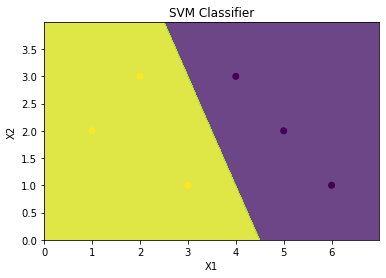

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Create the dataset
X = np.array([[1, 2], [2, 3], [3, 1], [4, 3], [5, 2], [6, 1]])
y = np.array([1, 1, 1, -1, -1, -1])

# Create and fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Plot the decision boundary
w = model.coef_[0]
b = model.intercept_[0]
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('SVM Classifier')
plt.show()

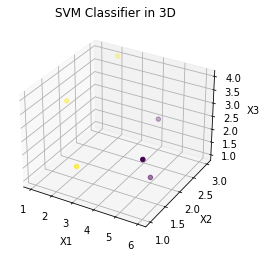

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Create the dataset
X = np.array([[1, 2, 3], [2, 3, 4], [3, 1, 2], [4, 3, 2], [5, 2, 1], [6, 1, 3]])
y = np.array([1, 1, 1, -1, -1, -1])

# Create and fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Plot the decision boundary in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1),
                         np.arange(z_min, z_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('SVM Classifier in 3D')
plt.show()
